In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [20]:
data_path = os.getcwd() + "/dataset/raw_labelled/win_S01.csv"
# features = ["A_F", "A_V", "A_L", "L_F", "L_T", "L_L", "T_F", "T_V", "T_L"]

dataset = pd.read_csv(data_path)
time = list(dataset['time'])
Action = list(dataset['Action'])

TFdata = dataset[["T_F"]].values
TVdata = dataset[["T_V"]].values
TLdata = dataset[["T_L"]].values

window_length = int(1*64)
total_windows = int((len(dataset))/window_length)

In [21]:
TFdata = np.array(TFdata)
TVdata = np.array(TVdata)
TLdata = np.array(TLdata)

In [22]:
Tsensor = np.multiply(TFdata, TFdata) + np.multiply(TVdata, TVdata) + np.multiply(TLdata, TLdata)
Tsensor = np.sqrt(Tsensor)

# del TFdata, TVdata, TLdata

In [23]:
Tsensor = (Tsensor-Tsensor.mean())/Tsensor.std()

In [24]:
# TFdata = (TFdata-TFdata.mean())/TFdata.std()
# TVdata = (TVdata-TVdata.mean())/TVdata.std()
# TLdata = (TLdata-TLdata.mean())/TLdata.std()

In [25]:
from scipy.signal import stft, get_window
import numpy as np
rng = np.random.default_rng()

In [26]:
start = 0
stop = 64
x = range(1, (stop-start+1))
y = TFdata[start:stop].flatten()

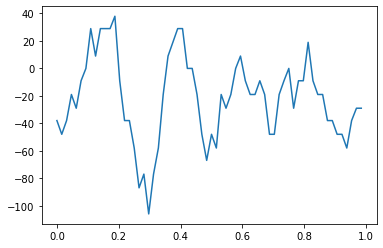

In [27]:
fs = 64
N = len(y)
amp = 0.5
time = np.arange(N) / float(fs)
plt.plot(time, y)

c:\Users\ESA LAB\anaconda3\envs\HighHeelWhatever\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 64, using nperseg = 64
  warnings.warn('nperseg = {0:d} is greater than input length '


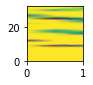

In [18]:
fig, ax = plt.subplots(figsize = (1, 1))
f, t, Zxx = stft(x=y, fs=fs)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
plt.show()